<a href="https://colab.research.google.com/github/ashasmalik/MLSP24/blob/main/fa21_bse_120_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-April-2024
# CSC354 – Assignmen3 – ML – Support Vector Machines
# Malik Ashas Abbas
# fa21-bse-120
**Support Vector Machines**

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

**Read the First DataSet for Question no 1**


In [2]:
df = pd.read_csv("dataset-q-1.csv", header=None)
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

**fit a linear SVM (using default parameter settings)**

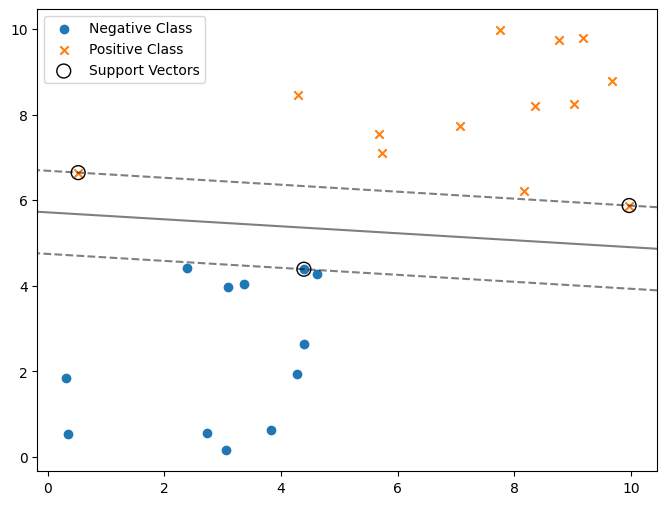

In [8]:
svm_model = SVC(kernel='linear')
svm_model.fit(features, target)

plt.figure(figsize=(8, 6))
plt.scatter(features[target == -1].iloc[:, 0], features[target == -1].iloc[:, 1], label='Negative Class', marker='o')
plt.scatter(features[target == 1].iloc[:, 0], features[target == 1].iloc[:, 1], label='Positive Class', marker='x')

axes = plt.gca()
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()

x_axis = np.linspace(x_lim[0], x_lim[1], 30)
y_axis = np.linspace(y_lim[0], y_lim[1], 30)
YY, XX = np.meshgrid(y_axis, x_axis)

grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)

axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.show()

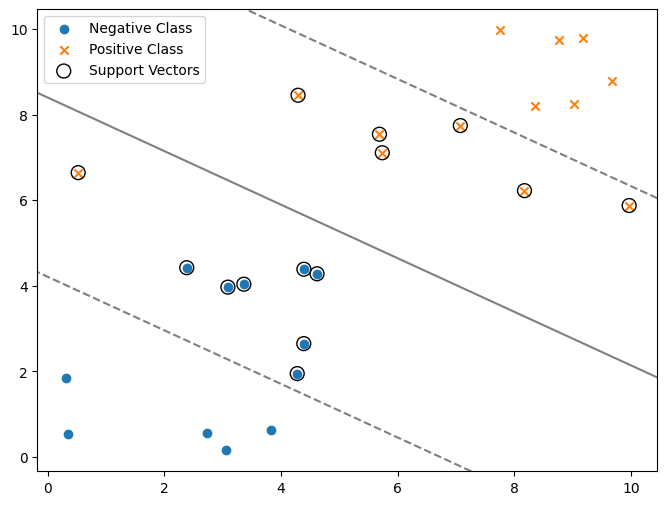

In [13]:
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(features, target)

plt.figure(figsize=(8, 6))
plt.scatter(features[target == -1].iloc[:, 0], features[target == -1].iloc[:, 1], label='Negative Class', marker='o')
plt.scatter(features[target == 1].iloc[:, 0], features[target == 1].iloc[:, 1], label='Positive Class', marker='x')
axes = plt.gca()
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()

x_axis = np.linspace(x_lim[0], x_lim[1], 30)
y_axis = np.linspace(y_lim[0], y_lim[1], 30)
YY, XX = np.meshgrid(y_axis, x_axis)

grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)

axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.show()

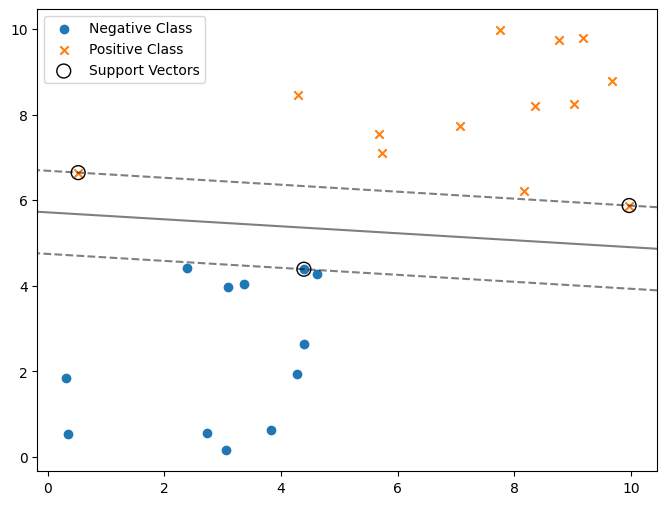

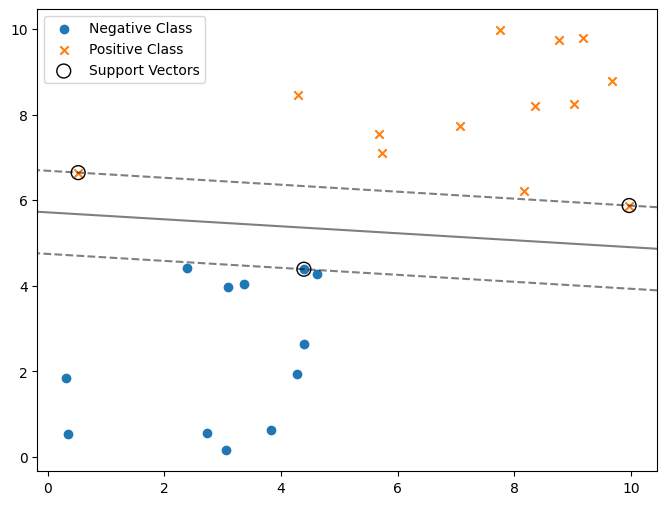

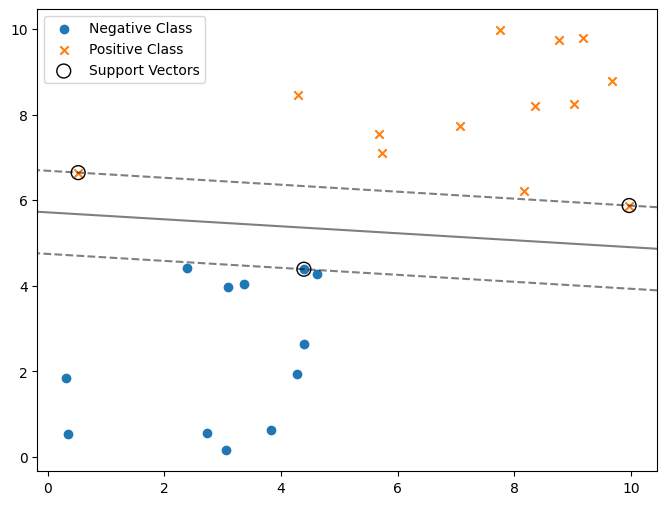

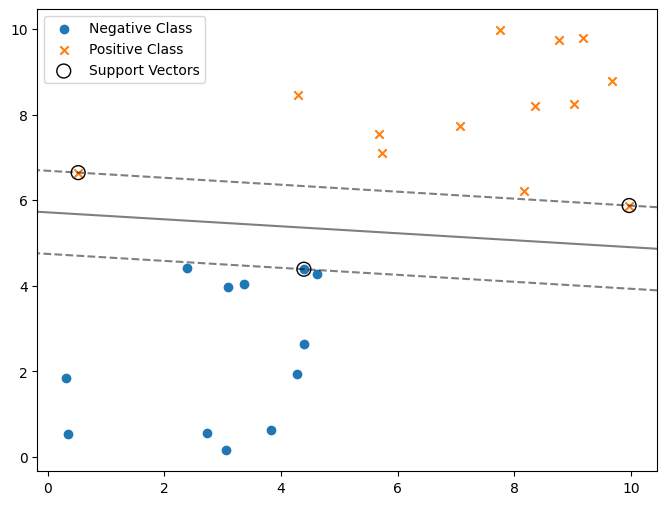

In [21]:
c_values = [100, 300, 700, 1000]
for c in c_values:
    svm_model = SVC(kernel='linear', C=c)
    svm_model.fit(features, target)

    plt.figure(figsize=(8, 6))
    plt.scatter(features[target == -1].iloc[:, 0], features[target == -1].iloc[:, 1], label='Negative Class', marker='o')
    plt.scatter(features[target == 1].iloc[:, 0], features[target == 1].iloc[:, 1], label='Positive Class', marker='x')

    axes = plt.gca()
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()

    x_axis = np.linspace(x_lim[0], x_lim[1], 30)
    y_axis = np.linspace(y_lim[0], y_lim[1], 30)
    YY, XX = np.meshgrid(y_axis, x_axis)

    grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
    decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)
    axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.show()

**Question3: famous ML Iris dataset and only the first two features**

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**BY Using kernel=poly and degree=2**


In [24]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, Y_train)

prediction = svm_poly.predict(x_test)
print("SVM with polynomial kernel degree 2")
accuracy = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}")

SVM with polynomial kernel degree 2
Accuracy: 0.8333


**BY Using kernel=rbf and gamma=1**


In [25]:
svm_rbf = SVC(kernel='rbf', gamma=1)
svm_rbf.fit(X_train, Y_train)

prediction = svm_rbf.predict(x_test)
print("SVM with Gaussian kernel sigma 1")
accuracy = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}")

SVM with Gaussian kernel sigma 1
Accuracy: 0.9000


In [26]:
poly_param = [(1, 2), (10, 3), (100, 2)]
for C, degree in poly_param:
    svm_poly = SVC(kernel='poly', degree=degree, C=C)
    svm_poly.fit(X_train, Y_train)

    y_pred_poly = svm_poly.predict(x_test)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)

    print(f"SVM with polynomial kernel (degree={degree}, C={C}):")
    print(f"  Accuracy: {accuracy_poly:.4f}")


SVM with polynomial kernel (degree=2, C=1):
  Accuracy: 0.8333
SVM with polynomial kernel (degree=3, C=10):
  Accuracy: 0.8000
SVM with polynomial kernel (degree=2, C=100):
  Accuracy: 0.9000


In [27]:
rbf_param = [(1, 0.1), (10, 2), (100, 10)]

for C, sigma in rbf_param:
    svm_rbf = SVC(kernel='rbf', gamma=1/(2*sigma**2), C=C)
    svm_rbf.fit(X_train, Y_train)

    y_pred_rbf = svm_rbf.predict(x_test)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

    print(f"SVM with Gaussian (RBF) kernel (sigma={sigma}, C={C}):")
    print(f"  Accuracy: {accuracy_rbf:.4f}")


SVM with Gaussian (RBF) kernel (sigma=0.1, C=1):
  Accuracy: 0.8333
SVM with Gaussian (RBF) kernel (sigma=2, C=10):
  Accuracy: 0.8333
SVM with Gaussian (RBF) kernel (sigma=10, C=100):
  Accuracy: 0.9000


**Question4:**

In [28]:
df = pd.read_csv("dataset-q-4.csv", header=None)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
rbf_param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100],
    'gamma': [0.01, 0.1, 1, 5, 10, 20, 50, 100]
}

svm_model = SVC(kernel='rbf')
svm_cv = GridSearchCV(svm_model, param_grid=rbf_param_grid, cv=5, scoring='accuracy')
svm_cv.fit(X_train, Y_train)

best_params = svm_cv.best_params_
best_score = svm_cv.best_score_
print("Best Parameters:", best_params)

best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, Y_train)
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy:.4f}")


Best Parameters: {'C': 50, 'gamma': 0.01}
Accuracy with Best Parameters: 0.9615
